# Waze Traffic dataset - Exploratory Data Analysis

## Objective

Exploratory data analysis of sample traffic dataset extracted from Waze to generate insights

## Data Source

The test dataset consists of Waze all alerts and jams made between "2017-07-08T16:00:00.000Z" and "2017-07-15T16:00:00.000Z" and falling within an 1km radius of 14°33'02.2"N 121°03'02.4"E (14.550620, 121.050666) -- roughly the center of Bonifacio High Street. The coordinates in the dataset use the WGS 84 spatial system.

## Understanding the data attributes

### Waze alerts

Alerts are the traffic information reported by Waze users through the Waze mobile application. Below are the data that we receive for each incident.

|    Label          | Description                                                                          |
|-------------------|--------------------------------------------------------------------------------------|
| pubMillis         | Publication date of incident in Unix Epoch Time   format.                            |
| location          | List of latitude and longitude coordinates   indicating the location of each report. |
| uuid              | Unique identification number.                                                        |
| type              | Event type.                                                                          |
| subtype           | Event subtype.                                                                       |
| reportDescription | Description of the report, when available.                                           |
| street            | Street name of the location of the traffic jam,   when available.                    |
| city              | City and state name of the location of the   traffic jam, when available.            |
| country           | Two letter code of the country.                                                      |
| roadType          | Road type                                                                            |
| reportRating      | User rank rating between 1 to 6, where 6 is the   highest.                           |
| reliability       | Reliability score of a report between 0-10.                                          |
| confidence        | Confidence score of a report                                                         |
| nThumbsUp         | Number of “ThumbsUp” given by other waze mobile   application users.                 |
| request_time      | Time when the request to the feed was made.                                          |

### Waze jams

The jams section includes data gathered in real time about traffic slowdowns on specific road Segments.

|    Label          | Description                                                                          |
|-------------------|--------------------------------------------------------------------------------------|
| pubMillis         | Publication date of incident in Unix Epoch Time   format.                            |
| location          | List of latitude and longitude coordinates   indicating the location of each report. |
| uuid              | Unique identification number.                                                        |
| type              | Event type.                                                                          |
| subtype           | Event subtype.                                                                       |
| reportDescription | Description of the report, when available.                                           |
| street            | Street name of the location of the traffic jam,   when available.                    |
| city              | City and state name of the location of the   traffic jam, when available.            |
| country           | Two letter code of the country.                                                      |
| roadType          | Road type                                                                            |
| reportRating      | User rank rating between 1 to 6, where 6 is the   highest.                           |
| reliability       | Reliability score of a report between 0-10.                                          |
| confidence        | Confidence score of a report                                                         |
| nThumbsUp         | Number of “ThumbsUp” given by other waze mobile   application users.                 |
| request_time      | Time when the request to the feed was made.                                          |

## Analysis pipeline - the OSEMN approach

 - **Obtain the data** <br>
 The dataset is an extract of the GMB corpus which is tagged, annotated. It is in tab separated text file.
 - **Scrubbing / Cleaning the data** <br>
 Initial data exploration and preparation for analysis
 - **Exploring / Visualizing our data** <br>
 Basic EDA to understand the data
 - **Modeling the data** <br>
 - **Interpreting the results** <br>

As per the scope of this analysis, we will limit ourselves to the EDA step only

### Environment set-up and loading dependencies

Anaconda is used to do the analysis, which is an easy-to-install, free, enterprise-ready Python distribution for data analytics, processing, and scientific computing.
Dependencies used are below -

In [2]:
#Data analysis
import pandas as pd
import numpy as np
import datetime as dt
#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Obtain the data

In [3]:
data_alerts = pd.read_json('alerts-processed.json', orient = 'records')
data_jams = pd.read_json('jams-processed.json', orient = 'records')

## Scrubbing / Cleaning the data 

In [4]:
#Let us take a sneak peek into the dataset first
data_alerts.head()

,city,confidence,country,location,nThumbsUp,pubMillis,reliability,reportDescription,reportRating,request_time,roadType,street,subtype,type,uuid
0,Taguig,0,RP,"{'x': 121.051426, 'y': 14.550786}",0.0,1500025753030,5,NaN,1,2017-07-14 09:50:29,1.0,9th Ave,JAM_HEAVY_TRAFFIC,JAM,0b36d5b7-e3e2-3a1f-9b28-59f28101882c
1,Taguig,0,RP,"{'x': 121.051426, 'y': 14.550786}",0.0,1500025753030,5,NaN,1,2017-07-14 09:52:30,1.0,9th Ave,JAM_HEAVY_TRAFFIC,JAM,0b36d5b7-e3e2-3a1f-9b28-59f28101882c
2,Taguig,0,RP,"{'x': 121.051426, 'y': 14.550786}",0.0,1500025753030,5,NaN,1,2017-07-14 09:54:31,1.0,9th Ave,JAM_HEAVY_TRAFFIC,JAM,0b36d5b7-e3e2-3a1f-9b28-59f28101882c
3,Taguig,0,RP,"{'x': 121.051426, 'y': 14.550786}",0.0,1500025753030,5,NaN,1,2017-07-14 09:56:32,1.0,9th Ave,JAM_HEAVY_TRAFFIC,JAM,0b36d5b7-e3e2-3a1f-9b28-59f28101882c
4,Taguig,0,RP,"{'x': 121.051426, 'y': 14.550786}",0.0,1500025753030,5,NaN,1,2017-07-14 09:58:33,1.0,9th Ave,JAM_HEAVY_TRAFFIC,JAM,0b36d5b7-e3e2-3a1f-9b28-59f28101882c


In [5]:
data_jams.head()

,blockingAlertUuid,city,country,delay,endNode,length,level,line,pubMillis,request_time,roadType,speed,startNode,street,turnType,type,uuid
0,NaN,Taguig,RP,99,9th Ave,200,3,"[{'x': 121.049383, 'y': 14.550538}, {'x': 121....",1499556154925,2017-07-08 23:22:39,1,1.433333,NaN,Lane O,NONE,NONE,1213296112
1,NaN,Taguig,RP,98,9th Ave,200,3,"[{'x': 121.049383, 'y': 14.550538}, {'x': 121....",1499556154925,2017-07-08 23:24:39,1,1.447222,NaN,Lane O,NONE,NONE,1213296112
2,NaN,Taguig,RP,97,9th Ave,200,3,"[{'x': 121.049383, 'y': 14.550538}, {'x': 121....",1499556154925,2017-07-08 23:26:40,1,1.455556,NaN,Lane O,NONE,NONE,1213296112
3,NaN,Taguig,RP,95,9th Ave,200,3,"[{'x': 121.049383, 'y': 14.550538}, {'x': 121....",1499556154925,2017-07-08 23:28:40,1,1.475000,NaN,Lane O,NONE,NONE,1213296112
4,NaN,Taguig,RP,87,9th Ave,200,3,"[{'x': 121.049383, 'y': 14.550538}, {'x': 121....",1499763636955,2017-07-11 09:12:19,1,1.563889,NaN,Lane O,NONE,NONE,1415492894


In [6]:
data_alerts.shape

(42737, 15)

In [8]:
data_alerts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42737 entries, 0 to 42736
Data columns (total 15 columns):
city                 41261 non-null object
confidence           42737 non-null int64
country              42737 non-null object
location             42737 non-null object
nThumbsUp            22351 non-null float64
pubMillis            42737 non-null int64
reliability          42737 non-null int64
reportDescription    433 non-null object
reportRating         42737 non-null int64
request_time         42737 non-null datetime64[ns]
roadType             42479 non-null float64
street               41948 non-null object
subtype              42737 non-null object
type                 42737 non-null object
uuid                 42737 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(8)
memory usage: 4.9+ MB


*We have around 42737 samples and 15 columns. Few samples do not have the cities tagged. Also, only few report descriptions are available per sample.* 

In [9]:
data_jams.shape

(58303, 17)

In [10]:
data_jams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58303 entries, 0 to 58302
Data columns (total 17 columns):
blockingAlertUuid    76 non-null object
city                 58125 non-null object
country              58303 non-null object
delay                58303 non-null int64
endNode              53721 non-null object
length               58303 non-null int64
level                58303 non-null int64
line                 58303 non-null object
pubMillis            58303 non-null int64
request_time         58303 non-null datetime64[ns]
roadType             58303 non-null int64
speed                58303 non-null float64
startNode            2406 non-null object
street               58267 non-null object
turnType             58303 non-null object
type                 58303 non-null object
uuid                 58303 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(9)
memory usage: 7.6+ MB


*The jams dataset is larger than the alerts, its possible that every alert might not have their corresponding jam data. We have around 58303 samples, but start node data is available only for few samples (2406).*

In [12]:
# Lets check the uuids of both datasets
print("UUID for Alerts data:", data_alerts['uuid'].head())
print("UUID for Jams data:", data_jams['uuid'].head())

UUID for Alerts data: 0    0b36d5b7-e3e2-3a1f-9b28-59f28101882c
1    0b36d5b7-e3e2-3a1f-9b28-59f28101882c
2    0b36d5b7-e3e2-3a1f-9b28-59f28101882c
3    0b36d5b7-e3e2-3a1f-9b28-59f28101882c
4    0b36d5b7-e3e2-3a1f-9b28-59f28101882c
Name: uuid, dtype: object
UUID for Jams data: 0    1213296112
1    1213296112
2    1213296112
3    1213296112
4    1415492894
Name: uuid, dtype: int64


*The alert generated UUID and Waze generated UUID for jams are different, which prevents us from merging both the tables. <br>
Let's check few more columns and see if we can remove few of the irrelevant columns* 

In [13]:
data_alerts['reportDescription'].unique()

array([nan, 'Broken motorcycle', 'At the corner of 30th and 5th',
       'papunta kalayaan', 'malas nman nya nabagsakan ng puno',
       'puta!!!!?',
       'A tree fell on a car causing buildup along 26th st cor 7th ave BGC',
       'D@mn it', 'putaaaaaaaah!!!??!!!!',
       "F this BS. WHY CANT YA'LL JUST STAY HOME. 🙄", 'NS 3219 GAGO KA',
       'Hhaaaayy', 'Earthquake drill @ bgc ongoing ', 'puta', '13 pa',
       'bgc', 'Konting ulan traffic! 😡😡😡', 'blocked intersection',
       'change work nalang. Lugosi negosyo',
       '*** inAng hoop yan..rush our iisa.', 'left side srvc rd', 'Puv',
       '47 traffic jam for half kilometer!!!', 'putik', 'Raining ',
       'UGHHHHHHH', '3-car collision ', 'cp garcia parking lot',
       'standstill', 'gutom nako!!', 'TRAFFICT.? Para sa jo mong exotic.',
       'Drizzling '], dtype=object)

*The report description data mostly contains text and we cannot extract any valuable insights from it. We can drop this.*

In [14]:
#Let's check the country data
data_alerts['country'].unique()

array(['RP'], dtype=object)

*We have data from only 1 country RP i.e. Philippines.*

In [16]:
#Let's check the city data
print("Cities in alerts data:", data_alerts['city'].unique())
print("Cities in jams data:", data_jams['city'].unique())

Cities in alerts data: ['Taguig' nan 'Makati']
Cities in jams data: ['Taguig' 'Makati' '' nan]


*So both the datasets have the same cities, we will remove the samples without any city marked.*

In [17]:
#We will drop the irrelevant columns
col_to_drop = ['country','reportDescription']
data_alerts = data_alerts[data_alerts.columns.drop(col_to_drop)]
data_jams = data_jams[data_jams.columns.drop('country')]

In [18]:
#We will also drop the rows with no marked cities
data_alerts = data_alerts.dropna(subset=['city'])
data_jams = data_jams.dropna(subset=['city'])

In [19]:
#Lets check the shape of the datasets now
print('Shape of alerts data:',data_alerts.shape)
print('Shape of jams data:',data_jams.shape)

Shape of alerts data: (41261, 13)
Shape of jams data: (58125, 16)


In [27]:
#Lets check the categorical data we are dealing with in alerts
print('Categories of reporters in alerts:', data_alerts['reportRating'].unique())
print('Number of types of road in alerts:', data_alerts['roadType'].nunique())
print('Number of streets in alerts:', data_alerts['reportRating'].nunique())
print('Categories of confidence levels:', data_alerts['confidence'].unique())
print('Categories of reliability levels:', data_alerts['reliability'].unique())
print('Types of alert events:', data_alerts['type'].unique())
print('Types of alert subtype events', data_alerts['subtype'].nunique())

Categories of reporters in alerts: [1 2 3 0 4 5]
Number of types of road in alerts: 6
Number of streets in alerts: 6
Categories of confidence levels: [ 0  1  2  5  4  3 -1]
Categories of reliability levels: [ 5  6  7 10  9  8]
Types of alert events: ['JAM' 'WEATHERHAZARD' 'ACCIDENT' 'ROAD_CLOSED']
Types of alert subtype events 23


*So we have user ranking from 0 - 5 <br>
The alerts dataset has 6 different road types and 6 streets <br>
The confidence level ranges from -1 to 5 <br>
The reliability level ranges from 5 - 10 - this also suggests that most of the alerts are marked reliable <br>
We have 4 major alert types and around 23 sub type of alerts.*

In [30]:
#Lets check the categorical data we are dealing with in alerts
print('Number of types of road in alerts:', data_jams['roadType'].nunique())
print('Number of streets in alerts:', data_jams['street'].nunique())
print('Number of type of turns:', data_jams['turnType'].nunique())
print('Categories of levels of traffic congestion:', data_jams['level'].unique())
print('Categories of types of jams:', data_jams['type'].unique())

Number of types of road in alerts: 4
Number of streets in alerts: 76
Number of type of turns: 1
Categories of levels of traffic congestion: [3 4 2 1 5]
Categories of types of jams: ['NONE' 'Small' 'Medium' 'Large' 'Huge']


*Some interesting points to note here - <br>
The jam data have less road types but more street types. Its possible that the user shares the alert in one street but the jam is spread out on a larger area - covering more streets. <br>
There is only one type of turn, therefore this column is not much of use. <br>
We have 5 different traffic congestion levels <br>
There are 5 different types of jams as well* <br>

In [32]:
#Lets check the type of events reported by each reporter group in Taguig city
pd.crosstab(data_alerts[data_alerts['city'] == 'Taguig']['reportRating'], data_alerts[data_alerts['city'] == 'Taguig']['type'])

type,ACCIDENT,JAM,ROAD_CLOSED,WEATHERHAZARD
reportRating,,,,
0,236,4543,11,359
1,375,11787,62,924
2,534,11211,80,1359
3,160,4931,4,632
4,15,752,15,129
5,0,108,0,145


In [33]:
#Lets check the type of events reported by each reporter group in Makati city
pd.crosstab(data_alerts[data_alerts['city'] == 'Makati']['reportRating'], data_alerts[data_alerts['city'] == 'Makati']['type'])

type,ACCIDENT,JAM,WEATHERHAZARD
reportRating,,,
0,36,484,0
1,57,990,57
2,12,781,60
3,0,231,38
4,40,103,0


*During the observation period, there were no road closed events in Makati city. <br>
Also, it is possible that waze reports are more active in Taguig city. 
The number of events is high in Taguig city which shows that the city requires a lot of work to improve road safety and traffic measures. <br>
The number of accidents in Taguig are exponentially higher, which is a cause of concern. <br>
It can also be seen that the reporters who are ranked highest are least active in reporting events. A general trend can be observed where reporters start reporting events, gains experience and by the time they reach a higher ranking, they stop reporting. Usually higher ranked reporters should be encouraged to participate more.*

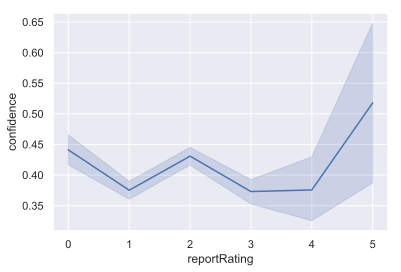

In [34]:
#Lets check the relationship between confidence scores and reporter ranking
sns.set(style='darkgrid')
sns.lineplot(x='reportRating', y='confidence', data=data_alerts)

*It can be observed that only higher ranked reporters have high confidence scores. Also, most of the reporters receive less than 50% confidence scores, which indicates that most of the reports do not receive feedbacks from other users. If the feedback mechanism is improved then the quality of reports will also improve.*

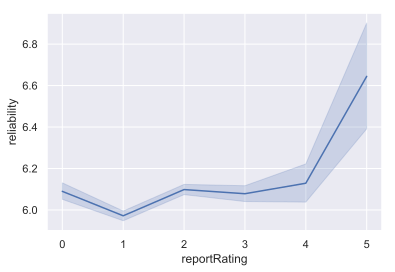

In [35]:
#Lets check the relationship between reliability scores and reporter ranking
sns.set(style='darkgrid')
sns.lineplot(x='reportRating', y='reliability', data=data_alerts)

*Reliability shows the trustworthiness and experience of a reporter. Therefore, we can see from the graph that as the rating increases so does the reliability.* 

In [60]:
#Lets check how confidently each event type is reported
data_alerts.groupby(['type'])['confidence'].agg('mean')

type
ACCIDENT         0.981570
JAM              0.359734
ROAD_CLOSED      0.000000
WEATHERHAZARD    0.621658
Name: confidence, dtype: float64

*Accidents are reported with very high confidence level, which is a sign that people are very active in reporting accidents. This is a valuable insight as this data can be used to take proper measure during accidents.*

In [61]:
#Lets check the reliability numbers for each event type
data_alerts.groupby(['type'])['reliability'].agg('mean')

type
ACCIDENT         7.377474
JAM              5.922719
ROAD_CLOSED      5.000000
WEATHERHAZARD    6.861734
Name: reliability, dtype: float64

*Once again we see that accidents are reported by reliable reporters so the information is likely to be correct in most of the cases.*

In [55]:
#lets check the average speed per jam level
for x in range(6):
    print('Average speed for jam level', x, 'is:',data_jams[(data_jams['level'] == x)]['speed'].agg('mean'))

Average speed for jam level 0 is: nan
Average speed for jam level 1 is: 3.116626299323843
Average speed for jam level 2 is: 2.379964917524163
Average speed for jam level 3 is: 1.8940118441981744
Average speed for jam level 4 is: 1.0812534749963816
Average speed for jam level 5 is: 0.0


*Jam type 0 can be thought of a clear road with no jam at all, as the level increases the average speed of the vehicles decreases.*

In [49]:
#lets check the average speed per jam type
for x in ['None','Small','Medium','Large', 'Huge']:
    print('Average speed for jam type', x, 'is:', data_jams[(data_jams['type'] == x)]['speed'].agg('mean'))

Average speed for jam type None is: nan
Average speed for jam type Small is: 1.1660133725923199
Average speed for jam type Medium is: 1.0567586912065416
Average speed for jam type Large is: 0.8874779541446207
Average speed for jam type Huge is: 0.37380952380952326


In [54]:
#Lets check maximum delay per jam level
for x in range(6):
    print('Maximum delay for jam level', x, 'is:',data_jams[(data_jams['level'] == x)]['delay'].agg('max'))

Maximum delay for jam level 0 is: nan
Maximum delay for jam level 1 is: 135
Maximum delay for jam level 2 is: 559
Maximum delay for jam level 3 is: 1444
Maximum delay for jam level 4 is: 7101
Maximum delay for jam level 5 is: -1


In [53]:
#Lets check maximum delay per jam type
for x in ['None','Small','Medium','Large', 'Huge']:
    print('Average speed for jam type', x, 'is:', data_jams[(data_jams['type'] == x)]['delay'].agg('max'))

Average speed for jam type None is: nan
Average speed for jam type Small is: 4502
Average speed for jam type Medium is: 5496
Average speed for jam type Large is: 6313
Average speed for jam type Huge is: 7101


*Based on the average speed and maximum delay values, it can be observed that the different jam types apply to the jam level 4 and 5 where either the jam is very significant or there is a road blockade.*

In [56]:
#Lets compare the traffic congestion levels and event types for every road type
pd.crosstab(data_jams['roadType'],data_jams['level'])

level,1,2,3,4,5
roadType,,,,,
1,447,3984,14755,12928,79
2,522,3192,8541,5857,0
4,75,430,1148,3137,0
6,57,201,913,1859,0


In [57]:
pd.crosstab(data_alerts['roadType'],data_alerts['type'])

type,ACCIDENT,JAM,ROAD_CLOSED,WEATHERHAZARD
roadType,,,,
1.0,682,17890,172,2419
2.0,360,10800,0,593
4.0,115,2201,0,178
6.0,286,4466,0,468
17.0,0,56,0,0
20.0,22,448,0,30


*Based on this we can infer that the road type 1 are heavily congested, this may be due to the fact that the roads are closed. Type 1 roads may be small roads or least maintained - due to which they are heavily impacted by weather hazards as well. They have high accident numbers so they require a lot of attention. These roads require to be upgraded or repaired. <br>
Type 1 roads are followed by type 2 which also faces heavy traffic congestion <br>
It can also be observed that as the type of road increases in value, the congestion and events reduce in numbers. Its possible that high quality roads have higher values - road type may be an indicator of road quality, higher the number, better the quality in terms of traffic control and road safety.*

In [67]:
#Lets go a level deeper and check the confidence scores for event subtypes
data_alerts.groupby(['subtype'])['confidence'].agg('mean')

subtype
                                      0.315377
ACCIDENT_MAJOR                        1.003155
ACCIDENT_MINOR                        0.883264
HAZARD_ON_ROAD_CAR_STOPPED            0.692446
HAZARD_ON_ROAD_CONSTRUCTION           0.698057
HAZARD_ON_ROAD_ICE                    0.183673
HAZARD_ON_ROAD_OBJECT                 0.430233
HAZARD_ON_ROAD_POT_HOLE               0.740741
HAZARD_ON_ROAD_ROAD_KILL              0.666667
HAZARD_ON_ROAD_TRAFFIC_LIGHT_FAULT    1.000000
HAZARD_ON_SHOULDER_ANIMALS            0.587302
HAZARD_ON_SHOULDER_CAR_STOPPED        0.243316
HAZARD_ON_SHOULDER_MISSING_SIGN       1.204545
HAZARD_WEATHER                        0.478261
HAZARD_WEATHER_FLOOD                  0.431579
HAZARD_WEATHER_FOG                    0.000000
HAZARD_WEATHER_HAIL                  -0.571429
JAM_HEAVY_TRAFFIC                     0.410482
JAM_MODERATE_TRAFFIC                  0.040412
JAM_STAND_STILL_TRAFFIC               0.409699
ROAD_CLOSED_CONSTRUCTION              0.000000
ROAD_

In [68]:
data_alerts.groupby(['subtype'])['reliability'].agg('mean')

subtype
                                       5.800196
ACCIDENT_MAJOR                         7.406940
ACCIDENT_MINOR                         7.310950
HAZARD_ON_ROAD_CAR_STOPPED             7.187050
HAZARD_ON_ROAD_CONSTRUCTION            6.763827
HAZARD_ON_ROAD_ICE                     5.836735
HAZARD_ON_ROAD_OBJECT                  7.767442
HAZARD_ON_ROAD_POT_HOLE                6.629630
HAZARD_ON_ROAD_ROAD_KILL               7.000000
HAZARD_ON_ROAD_TRAFFIC_LIGHT_FAULT    10.000000
HAZARD_ON_SHOULDER_ANIMALS             7.015873
HAZARD_ON_SHOULDER_CAR_STOPPED         6.034759
HAZARD_ON_SHOULDER_MISSING_SIGN        7.090909
HAZARD_WEATHER                         6.565217
HAZARD_WEATHER_FLOOD                   6.926316
HAZARD_WEATHER_FOG                     5.000000
HAZARD_WEATHER_HAIL                    6.285714
JAM_HEAVY_TRAFFIC                      6.021632
JAM_MODERATE_TRAFFIC                   5.203381
JAM_STAND_STILL_TRAFFIC                6.047382
ROAD_CLOSED_CONSTRUCTION        

*From the event sub types, it can be observed that accidents followed by road hazards such as due to traffic light issues, road kills, car stopped etc. are reported with high confidence and reliability scores. It can also be seen that these hazard types are also potential accident events which may have been caused due to an accident or which ultimately resulted in an accident. Such high scores reflect the activeness of the reporters in reporting such incidents.*  

In [69]:
#Lets take an example of a typical accident scenario to understand how the data reflects the event
major_accident = data_alerts[data_alerts['subtype'] == 'ACCIDENT_MAJOR']
major_accident[major_accident['street']=='Lane Q']

,city,confidence,location,nThumbsUp,pubMillis,reliability,reportRating,request_time,roadType,street,subtype,type,uuid
1789,Taguig,0,"{'x': 121.050381, 'y': 14.553057}",NaN,1499652082140,5,0,2017-07-10 02:27:08,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT,17fa2e3c-dab4-30f1-a263-3d4a6be28da4
1790,Taguig,0,"{'x': 121.050381, 'y': 14.553057}",NaN,1499652082140,5,0,2017-07-10 02:29:09,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT,17fa2e3c-dab4-30f1-a263-3d4a6be28da4
1791,Taguig,0,"{'x': 121.050381, 'y': 14.553057}",NaN,1499652082140,5,0,2017-07-10 02:31:10,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT,17fa2e3c-dab4-30f1-a263-3d4a6be28da4
1792,Taguig,0,"{'x': 121.050381, 'y': 14.553057}",NaN,1499652082140,5,0,2017-07-10 02:11:03,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT,17fa2e3c-dab4-30f1-a263-3d4a6be28da4
1793,Taguig,0,"{'x': 121.050381, 'y': 14.553057}",NaN,1499652082140,5,0,2017-07-10 02:19:05,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT,17fa2e3c-dab4-30f1-a263-3d4a6be28da4
1794,Taguig,0,"{'x': 121.050381, 'y': 14.553057}",NaN,1499652082140,5,0,2017-07-10 02:23:07,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT,17fa2e3c-dab4-30f1-a263-3d4a6be28da4
1795,Taguig,0,"{'x': 121.050381, 'y': 14.553057}",NaN,1499652082140,5,0,2017-07-10 02:25:07,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT,17fa2e3c-dab4-30f1-a263-3d4a6be28da4
1796,Taguig,0,"{'x': 121.050381, 'y': 14.553057}",NaN,1499652082140,5,0,2017-07-10 02:21:06,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT,17fa2e3c-dab4-30f1-a263-3d4a6be28da4
1797,Taguig,0,"{'x': 121.050381, 'y': 14.553057}",NaN,1499652082140,5,0,2017-07-10 02:13:03,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT,17fa2e3c-dab4-30f1-a263-3d4a6be28da4
1798,Taguig,0,"{'x': 121.050381, 'y': 14.553057}",NaN,1499652082140,5,0,2017-07-10 02:15:04,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT,17fa2e3c-dab4-30f1-a263-3d4a6be28da4


In [70]:
#lets see what happened on 2017-07-10
data_alerts[data_alerts['uuid']=='17fa2e3c-dab4-30f1-a263-3d4a6be28da4'][['city','confidence','reliability','reportRating','request_time','roadType','street','subtype','type']].sort_values(by=['request_time'])

,city,confidence,reliability,reportRating,request_time,roadType,street,subtype,type
1800,Taguig,0,5,0,2017-07-10 02:03:00,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT
1803,Taguig,0,5,0,2017-07-10 02:05:00,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT
1801,Taguig,0,5,0,2017-07-10 02:07:01,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT
1802,Taguig,0,5,0,2017-07-10 02:09:02,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT
1792,Taguig,0,5,0,2017-07-10 02:11:03,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT
1797,Taguig,0,5,0,2017-07-10 02:13:03,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT
1798,Taguig,0,5,0,2017-07-10 02:15:04,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT
1799,Taguig,0,5,0,2017-07-10 02:17:05,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT
1793,Taguig,0,5,0,2017-07-10 02:19:05,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT
1796,Taguig,0,5,0,2017-07-10 02:21:06,1.0,Lane Q,ACCIDENT_MAJOR,ACCIDENT


In [72]:
accident_data = data_jams[(data_jams['street']=='Lane Q')].sort_values(by=['request_time'])
rows = [5815,5814,5813,5812,5811,5804,5805,5810,5806,5809,5807]
accident_data_10 = accident_data.loc[rows]
accident_data_10[['city','delay','length','level','roadType','speed','street','type','request_time']]

,city,delay,length,level,roadType,speed,street,type,request_time
5815,Taguig,270,200,4,1,0.644444,Lane Q,NONE,2017-07-10 01:38:51
5814,Taguig,278,200,4,1,0.627778,Lane Q,NONE,2017-07-10 01:40:51
5813,Taguig,287,200,4,1,0.608333,Lane Q,NONE,2017-07-10 01:42:52
5812,Taguig,260,200,4,1,0.663889,Lane Q,NONE,2017-07-10 01:50:55
5811,Taguig,230,200,4,1,0.738889,Lane Q,NONE,2017-07-10 01:46:54
5804,Taguig,96,200,3,1,1.466667,Lane Q,NONE,2017-07-10 03:15:25
5805,Taguig,89,200,3,1,1.538889,Lane Q,NONE,2017-07-10 04:17:47
5810,Taguig,89,200,3,1,1.544444,Lane Q,NONE,2017-07-10 04:19:48
5806,Taguig,88,200,3,1,1.555556,Lane Q,NONE,2017-07-10 04:21:49
5809,Taguig,86,200,3,1,1.575000,Lane Q,NONE,2017-07-10 04:23:50


*In this sample, we are looking at a major accident event which took place in the street "Lane Q" in Taguig city. The incident took place on 10th July, 2017 in the road type 1, famous for accidents. From the jam data, it can be observed that the accident took place at night around 1:30 AM. Due to the accident, a level 4 traffic congestion started in the area where the delay was about 270-230. At this point, as observed from the alerts data, the reporters started reporting the event, from 2 AM onwards. Most of the reporters had high reliability scores and reported the incident for about half an hour. Once everything was taken care of, the traffic congestion reduced and people were able to move. This can be seen in the change of congestion level and delay which drastically reduced post 3 AM.*  